In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [43]:
import csv

In [44]:
yelp = pd.read_csv("train.csv","~")

In [45]:
yelp.shape

(30172, 5)

In [7]:
yelp.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,11755,After reading mixed reviews I almost didn't bo...,Google Chrome,Desktop,Good
1,33912,This motor inn is located about - city blocks ...,Firefox,Tablet,Good
2,10143,It was our first time there and surely not our...,Google Chrome,Mobile,Good
3,33114,"Great hotel in an excellent location, just off...",Mozilla,Desktop,Good
4,17464,We stayed at the hotel for - weeks to get away...,Google Chrome,Desktop,Good


In [8]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30172 entries, 0 to 30171
Data columns (total 5 columns):
User_ID         30172 non-null int64
Description     30172 non-null object
Browser_Used    30172 non-null object
Device_Used     30172 non-null object
Is_Response     30172 non-null object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [9]:
yelp.describe()

,User_ID
count,30172.000000
mean,19394.643113
std,11255.034590
min,0.000000
25%,9649.750000
50%,19358.500000
75%,29173.250000
max,38931.000000


In [10]:
yelp['text length'] = yelp['Description'].apply(len)
yelp.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,text length
0,11755,After reading mixed reviews I almost didn't bo...,Google Chrome,Desktop,Good,1230
1,33912,This motor inn is located about - city blocks ...,Firefox,Tablet,Good,615
2,10143,It was our first time there and surely not our...,Google Chrome,Mobile,Good,505
3,33114,"Great hotel in an excellent location, just off...",Mozilla,Desktop,Good,424
4,17464,We stayed at the hotel for - weeks to get away...,Google Chrome,Desktop,Good,654


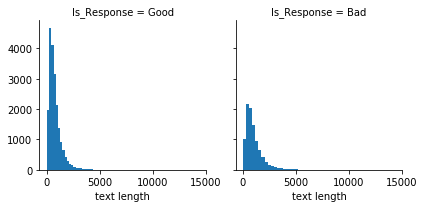

In [11]:
g = sns.FacetGrid(data=yelp, col='Is_Response')
g.map(plt.hist, 'text length', bins=50)

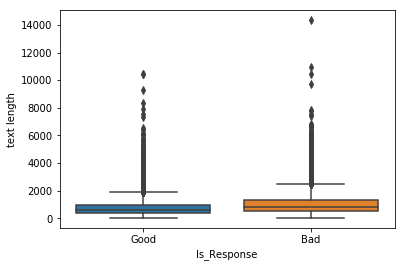

In [12]:
sns.boxplot(x='Is_Response', y='text length', data=yelp)

In [13]:
stars = yelp.groupby('Is_Response').mean()
stars.corr()

,User_ID,text length
User_ID,1.0,1.0
text length,1.0,1.0


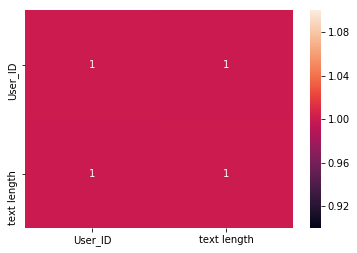

In [14]:
sns.heatmap(data=stars.corr(), annot=True)

In [15]:
yelp_class = yelp[(yelp['Is_Response'] == "Good") | (yelp['Is_Response'] == "Bad")]
yelp_class.shape


(30172, 6)

In [16]:
X = yelp_class['Description']
y = yelp_class['Is_Response']

In [20]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/surbhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [22]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))
# Output: ['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [26]:
len(bow_transformer.vocabulary_)

68894

In [27]:
review_25 = X[24]
review_25

'We stayed at this hotel for - nights. Our room had a great view of the bay and the city. It was a short walk to the gaslamp quarter but far enough away that it was quiet at night. It was also only a --min walk in the other direction to the bay. The staff was very helpful and over-the-top welcoming. They were able to answer all of our questions and reccomend attractions and restaurants. The king-sized bed in our room was amazing, we slept very well each night of our stay. We were very pleased to find starbucks coffee and tea in our room as well! The roof top pool certainly looked better in the pictures on their website. The pool and hot tub are in need of repair and cleaning. However, the other aspects of this hotel out shine their dingy pool so we will still be reccomending it to others!'

In [28]:
bow_25 = bow_transformer.transform([review_25])
bow_25

<1x68894 sparse matrix of type '<class 'numpy.int64'>'
	with 61 stored elements in Compressed Sparse Row format>

In [29]:
print(bow_transformer.get_feature_names()[11443])
print(bow_transformer.get_feature_names()[22077])

Marshal
andclose


In [30]:
X = bow_transformer.transform(X) 

In [32]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (30172, 68894)
Amount of Non-Zero occurrences:  2027529
Density: 0.09753973580665459


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
preds = nb.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[2077  807]
 [ 403 5765]]


              precision    recall  f1-score   support

         Bad       0.84      0.72      0.77      2884
        Good       0.88      0.93      0.91      6168

   micro avg       0.87      0.87      0.87      9052
   macro avg       0.86      0.83      0.84      9052
weighted avg       0.86      0.87      0.86      9052



In [40]:
positive_review = yelp_class['Description'][159]
positive_review

"Reservation manager, John Marshall, and his entire staff, made our stay at the Sofitel in Philadelphia one of the most pleasant travel experiences we've had in decades. His personal handling of our reservation, along with the meticulous care on the part of the staff was top-drawer from beginning to end."

In [46]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]


'Good'